# The Iris Dataset

The Iris dataset includes information about three iris species known as Setosa, Versicolor and Virginica. There are 50 instances of each iris species (150 in total). Each instance includes some information about the shape of the flower including **sepal length**, **sepal width**, **petal length** and **petal width**. As a result, our dataset includes 150 data points/record ($X_1$, $X_2$, ..., $X_{150}$) that have 4 features/attributes ($X_i \in R ^4$) and each input is associated with a class Y = {$Y_1$, $Y_1$, ... ,$Y_{150}$}, where $Y_i \in \{Setosa, Versicolor, Virginica\}$. 

You can download the Iris dataset from Studium.

We want to use KNN classifer to predict the class of unseen records (a new given flower) based on its sepal length, sepal width, petal length and petal width.

# Libraries that we use
We use the following libraries: 

**- NumPy:** stands for Numerical Python and it is a scientific computing library that provides efficient multi-dimensional array objects and various operations to work with these array objects.

**- pandas:** it is a library that is  widely used for data science/data analysis and machine learning tasks. Its power is in working with dataframes.

**- Scikit-learn:** it is a data analysis and machine learning library. Most of the wellknown data preprocessig and machine learning methods are implemented in this library.



First we import all the libraries that we will need in this asssignment:

In [1]:
import numpy as np
import pandas as pd

## Read data

We read the Iris dataset and put it in a pandas dataframe. 

In [2]:
iris_data = pd.read_csv('Iris.csv')

## Summarize dataset


Yo can get an idea how many data points/records (rows) and attributes/features (columns) your dataset has with *iris_data.shape()*: 

In [3]:
print(iris_data.shape)

(150, 6)


The *iris_data.head()* command shows the dataset's attributes and the first 5 records:

In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The *iris_data.describe()* command returns some statistical summary meaasures for numerical attributes/features:

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Now we want to know the number of records (rows) that belong to each class: 

In [6]:
iris_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Drop *id*

You can see that the dataframe includes an attribute called **id** that has to be removed from the dataframe as it does not have any role in our task.

In [7]:
iris_data.drop(['Id'],axis=1,inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Separate X, Y into different dataframes

As you saw, records (X) and classes (Y) are in the same dataframe. We put them into separate dataframes.

In [8]:
X = iris_data.drop(["Species"],axis=1).values
Y = iris_data["Species"].values

## Encoding The Attributes of The Target Column

As we can see labels are categorical. KNeighborsClassifier that we will use later on does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

## Split the data set into training and testing

As we discussed before, we have o check if our classifier works correctly or not. Therefore, we extract 20% of our data points (20% of 150 is 30) and keep them to test the classifier.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

## Using KNN for classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors = 3, p = 2, weights = 'uniform')
# n_neighbors = number of neighbors to use (K)
# p = Power parameter for the Minkowski metric. 
#     When p = 1, this is equivalent to using manhattan_distance (l1), 
#     and euclidean_distance (l2) for p = 2. 
# weights = weight function used in prediction
#     When = ‘uniform’: All points in each neighborhood are weighted equally.
#     When = ‘distance’: weight points by the inverse of their distance. 
#                        in this case, closer neighbors of a query point will have a greater 
#                        influence than neighbors which are further away.

# Fitting the model
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

## Evaluating the classifier

We will discuss evaluation metrics later on in this session.

In [12]:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


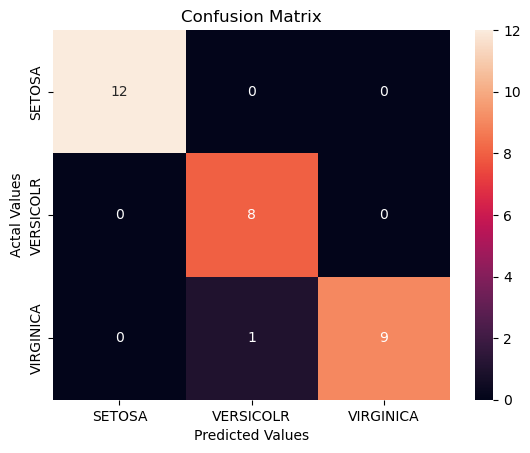

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(Y_test, Y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [26]:
print(classification_report(Y_test, Y_pred,  digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     0.8889    1.0000    0.9412         8
           2     1.0000    0.9000    0.9474        10

    accuracy                         0.9667        30
   macro avg     0.9630    0.9667    0.9628        30
weighted avg     0.9704    0.9667    0.9668        30

